In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_csv('C:\\Users\\HP\\Downloads\\hr_dataset.csv')


print(df.head())


print(df.info())


df.fillna(method='ffill', inplace=True)


label_encoder = LabelEncoder()
df['Employee ID'] = label_encoder.fit_transform(df['Employee ID'])
df['Department'] = label_encoder.fit_transform(df['Department'])


scaler = StandardScaler()
df['Satisfaction Score'] = scaler.fit_transform(df[['Satisfaction Score']])
df['Revenue Generated'] = scaler.fit_transform(df[['Revenue Generated']])



print(df.head())
print(df.info())


X = df.drop('Turnover Status', axis=1)
y = df['Turnover Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


  Employee ID Department  Work Hours  Training Hours  Absenteeism Rate  \
0     EMP0001         HR          45              37              4.07   
1     EMP0002      Sales          27              29              4.12   
2     EMP0003      Sales          30              36              4.73   
3     EMP0004         HR          25              18              9.54   
4     EMP0005  Marketing          51              38              1.07   

   Productivity Score  Satisfaction Score  Revenue Generated Turnover Status  
0                  61                 1.7            3956.61             Yes  
1                  72                 2.3            4670.09             Yes  
2                  84                 3.8            5448.44              No  
3                  67                 3.9            4345.78             Yes  
4                  61                 3.7            3956.61              No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data co

In [49]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [50]:
from sklearn.metrics import classification_report, accuracy_score


y_pred = model.predict(X_test)


print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.812
              precision    recall  f1-score   support

          No       0.81      1.00      0.90       814
         Yes       0.00      0.00      0.00       186

    accuracy                           0.81      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.66      0.81      0.73      1000



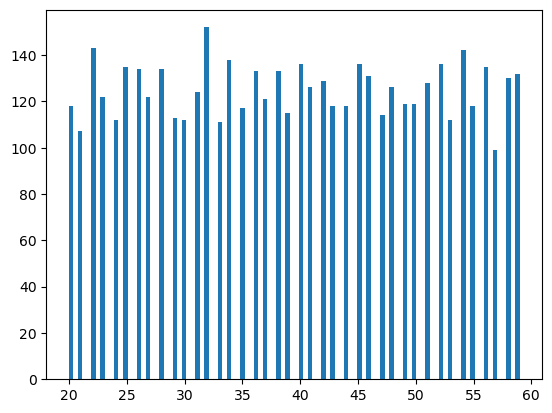

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['Work Hours'], bins=100)
plt.show()


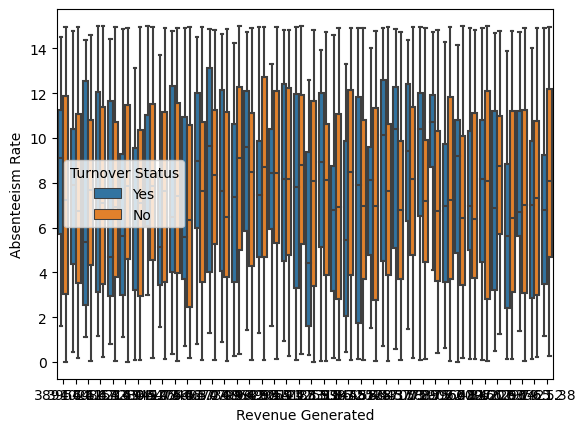

In [52]:
sns.boxplot(x='Revenue Generated', y='Absenteeism Rate', data=df, sym="", hue='Turnover Status')
plt.show()


In [2]:
df1 =df.dropna()
print(df1.head())

   Employee ID  Department  Work Hours  Training Hours  Absenteeism Rate  \
0            0           1          45              37              4.07   
1            1           4          27              29              4.12   
2            2           4          30              36              4.73   
3            3           1          25              18              9.54   
4            4           3          51              38              1.07   

   Productivity Score  Satisfaction Score  Revenue Generated Turnover Status  
0                  61           -1.101207          -1.595085             Yes  
1                  72           -0.586640          -0.647645             Yes  
2                  84            0.699776           0.385936              No  
3                  67            0.785537          -1.078301             Yes  
4                  61            0.614015          -1.595085              No  
